# Introduccion

Este notebook contiene los procesos que se han realizado para limpiar las bases de datos de contratos del sistema RENOVA de la SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRIVADA DE COLOMBIA. 

Contiene las funciones e scripts para cargar los datasets en Jupyter o Colab, a partir de archivos en formato CSV. 

Esta es la primera etapa del trabajo con esstos datos. 


In [1]:
# First import the required libraries.
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
# To load a file into colab:
import io
import os

In [3]:
# Ajustar No Maximo de Columnas para mostrar
# pd.get_option("display.max_columns")
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_columns', 20) # reset to default

In [4]:
# Ajustar el tamaño máximo de columna que se muestra
#pd.get_option('display.max_colwidth')
#pd.set_option('display.max_colwidth', -1) 
#pd.set_option('display.max_colwidth', 50)  # reset to default

In [5]:
# Ajustar el número máximo de filas para mostrar
#pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None) # mostrar todas
#pd.set_option('display.max_rows', 60) # reset to default

In [6]:
#para poder ver los montos en valores con todas las cifras significativas en vez de notación científica
pd.set_option('display.float_format',  '{:,.2f}'.format)

# Step 1: **Data Loading**

## Load CSV into colab 
From Google Drive only (DO NOT RUN if in Jupyter):

In [7]:
# For Using Google Drive, (Only if executing notebook from Google colab):
from google.colab import drive
drive.mount('/content/drive')

# after that:
# <--- Refresh mounted Drive
# <--- Look for file and get the path link

Mounted at /content/drive


### Find the file

In [8]:
# Get the current directory
print(os.getcwd())
# Check if the directory exists
print(os.path.exists('../'))

/content
True


In [9]:
ls

drive/  sample_data/


In [10]:
cd /content/drive/MyDrive/Observatorio SPVS/

/content/drive/MyDrive/Observatorio SPVS


# Exploracion de Sector Cliente Tipo Vigilado

In [11]:
Cliente_tipo_Vigilado = pd.read_csv('/content/drive/MyDrive/Observatorio SPVS/BD RENOVA - Contratos Todos los Clientes/contratos_sector_cliente_tipo_vigilado.csv', encoding = 'utf8') 
Cliente_tipo_Vigilado.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (15,16,23,25,33,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(177614, 55)

In [12]:
Cliente_tipo_Vigilado.columns

Index(['Unnamed: 0', 'ID_CONTRATO', 'FECHA_INICIO_CONTRATO',
       'FECHA_FIN_CONTRATO', 'MONTO_CONTRATO', 'CANTIDAD_PUESTOS_CONTRATO',
       'NIT_VIGILADO_x', 'DESCRIPCION_VALOR_AGREGADO', 'ID_ESTADO_CONTRATO',
       'FECHA_CONTRATO_ESTADO', 'MAXDATE', 'MINDATE', 'ID_CLIENTE',
       'TIPO_CONTRATO', 'ACTIVO_x', 'NUMERO_DOCUMENTO_CLIENTE',
       'DIGITO_VERIFICACION', 'RAZON_SOCIAL_CLIENTE', 'PRIMER_NOMBRE_CLIENTE',
       'SEGUNDO_NOMBRE_CLIENTE', 'PRIMER_APELLIDO_CLIENTE',
       'SEGUNDO_APELIDO_CLIENTE', 'SECTOR_CLIENTE', 'CIIU_CLIENTE',
       'DIRECCION_CLIENTE', 'TELEFONO_FIJO_CLIENTE', 'TELEFONO_MOVIL_CLIENTE',
       'CORREO_ELECTRONICO_CLIENTE', 'CORREO_ELECTRONICO_ALTERNATIVO_CLIENTE',
       'ID_CIUDAD', 'ID_DEPARTAMENTO', 'ID_DEPARTAMENTO1',
       'ID_TIPO_DOCUMENTO_IDENTIFICACION',
       'NUMERO_DOCUMENTO_REPRESENTANTE_LEGAL_CLIENTE', 'ID_TIPO_CLIENTE',
       'TIPO_VIA', 'NOMBRE_NUM_VIA', 'PREFIJO_UNO', 'PREFIJO_UNO_UNO',
       'NUMERO_VIA_GENERADORA', 'PREFIJO_D

In [13]:
Cliente_tipo_Vigilado['FECHA_FIN_CONTRATO'].str[:4].astype(int).describe()

count   177,614.00
mean      2,016.07
std           3.46
min       1,899.00
25%       2,014.00
50%       2,016.00
75%       2,018.00
max       2,213.00
Name: FECHA_FIN_CONTRATO, dtype: float64

In [14]:
Cliente_tipo_Vigilado['FECHA_CONTRATO_ESTADO'].str[:4].astype(float).describe()

count   39,169.00
mean     2,014.25
std          3.57
min      1,899.00
25%      2,013.00
50%      2,014.00
75%      2,015.00
max      2,213.00
Name: FECHA_CONTRATO_ESTADO, dtype: float64

In [15]:
Cliente_tipo_Vigilado['FECHA_INICIO_CONTRATO'].str[:4].astype(float).quantile(q = [0.90, 0.95, 0.99, 0.999, 0.9999])

0.90   2,018.00
0.95   2,019.00
0.99   2,020.00
1.00   2,020.00
1.00   2,020.00
Name: FECHA_INICIO_CONTRATO, dtype: float64

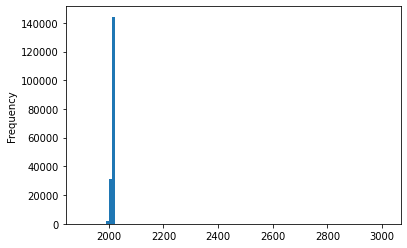

In [16]:
Cliente_tipo_Vigilado['FECHA_INICIO_CONTRATO'].str[:4].astype(float).plot.hist(bins = 100)

In [17]:
Cliente_tipo_Vigilado.groupby['NIT_VIGILADO', ]

TypeError: ignored

# Tareas:

- Sacar una proporcion del gasto en sectores

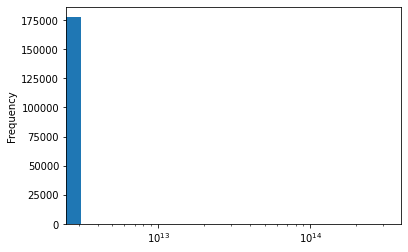

In [20]:
Cliente_tipo_Vigilado['MONTO_CONTRATO'].plot.hist(bins = 100, logx = True)

In [ ]:
Cliente_tipo_Vigilado['SECTOR_CLIENTE'].plot.hist(bins = 100, logx = True)

In [21]:
Cliente_tipo_Vigilado['SECTOR_CLIENTE'].value_counts()

1.00     38511
6.00     18641
12.00    14223
3.00      9207
10.00     6429
4.00      4423
11.00     1909
7.00      1818
9.00      1443
2.00      1363
8.00       536
5.00       361
Name: SECTOR_CLIENTE, dtype: int64

In [25]:
Cliente_tipo_Vigilado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177614 entries, 0 to 177613
Data columns (total 56 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Unnamed: 0                                                    177614 non-null  int64  
 1   ID_CONTRATO                                                   177614 non-null  int64  
 2   FECHA_INICIO_CONTRATO                                         177614 non-null  object 
 3   FECHA_FIN_CONTRATO                                            177614 non-null  object 
 4   MONTO_CONTRATO                                                177614 non-null  float64
 5   CANTIDAD_PUESTOS_CONTRATO                                     62366 non-null   float64
 6   NIT_VIGILADO_x                                                177614 non-null  int64  
 7   DESCRIPCION_VALOR_AGREGADO                              

In [24]:
Cliente_tipo_Vigilado['SECTOR_CLIENTE'].isna().sum()

78750

In [44]:
# mapeo de codigos de sectores

Cliente_tipo_Vigilado['TIPO_SERVICIO'] = Cliente_tipo_Vigilado['ID_TIPO_SERVICIO'].map({1: 'Empresa de Vigilancia y Seguridad Privadas con Armas',
                                                2: 'Empresa de Vigilancia y Seguridad Privadas sin Armas',
                                                3: 'Cooperativa de Vigilancia y Seguridad Privada',
                                                4: 'Empresa de Transporte de Valores',
                                                5: 'Empresa Blindadora',
                                                6: 'Empresa Arrendadora de Vehículos Blindados',
                                                7: 'Empresa Asesora, Consultora e Investigadora en Vigilancia y Seguridad Privada',
                                                8: 'Escuela de Capacitación y Entrenamiento en Vigilancia y Seguridad Privada' ,
                                                9: 'Inscripción en el Registro de Fabricantes, Importadores, Comercializadores, Arrendadores e Instaladores de Equipos para la Vigilancia y la Seguridad Privada',
                                                10: 'Servicio Comunitario de Vigilancia y Seguridad Privada',
                                                11: 'Departamento de Seguridad Persona Natural',
                                                12: 'Departamento de Seguridad Persona Jurídica'
                                               })
Cliente_tipo_Vigilado['TIPO_SERVICIO'].value_counts()

Empresa de Vigilancia y Seguridad Privadas sin Armas                                                                                                            75674
Empresa de Vigilancia y Seguridad Privadas con Armas                                                                                                            70979
Empresa Arrendadora de Vehículos Blindados                                                                                                                      15840
Cooperativa de Vigilancia y Seguridad Privada                                                                                                                    8566
Empresa Blindadora                                                                                                                                               3790
Empresa de Transporte de Valores                                                                                                                                 1340
Insc

In [40]:
# mapeo de codigos de sectores

Cliente_tipo_Vigilado['SECTOR_CLIENTE_DESC'] = Cliente_tipo_Vigilado['SECTOR_CLIENTE'].map({1: 'COMERCIAL',
                                                2: 'FINANCIERO',
                                                3: 'SERVICIOS',
                                                4: 'INDUSTRIAL',
                                                5: 'AGRICOLA Y GANADERO',
                                                6: 'RESIDENCIAL',
                                                7: 'GOBIERNO',
                                                8: 'MINAS Y ENERGIA' ,
                                                9: 'TRANSPORTES',
                                                10: 'VIGILANCIA',
                                                11: 'EDUCATIVO',
                                                12: 'OTRO'
                                               })
Cliente_tipo_Vigilado['SECTOR_CLIENTE_DESC'].value_counts()


COMERCIAL              38511
RESIDENCIAL            18641
OTRO                   14223
SERVICIOS               9207
VIGILANCIA              6429
INDUSTRIAL              4423
EDUCATIVO               1909
GOBIERNO                1818
TRANSPORTES             1443
FINANCIERO              1363
MINAS Y ENERGIA          536
AGRICOLA Y GANADERO      361
Name: SECTOR_CLIENTE_DESC, dtype: int64

In [52]:
serie_sectores = Cliente_tipo_Vigilado['SECTOR_CLIENTE_DESC']
#serie_sectores.dropna(inplace = True)

In [53]:
serie_sectores.value_counts().to_frame()

,SECTOR_CLIENTE_DESC
COMERCIAL,38511
RESIDENCIAL,18641
OTRO,14223
SERVICIOS,9207
VIGILANCIA,6429
INDUSTRIAL,4423
EDUCATIVO,1909
GOBIERNO,1818
TRANSPORTES,1443
FINANCIERO,1363


In [34]:
serie_sectores.value_counts(normalize=True, dropna = True)

COMERCIAL             0.39
RESIDENCIAL           0.19
OTRO                  0.14
SERVICIOS             0.09
VIGILANCIA            0.07
INDUSTRIAL            0.04
EDUCATIVO             0.02
GOBIERNO              0.02
TRANSPORTES           0.01
FINANCIERO            0.01
MINAS Y ENERGIA       0.01
AGRICOLA Y GANADERO   0.00
Name: SECTOR_CLIENTE, dtype: float64

In [39]:
Cliente_tipo_Vigilado['ID_CLIENTE'].value_counts().head()

145077    2747
89406      499
89449      426
40999      419
61301      348
Name: ID_CLIENTE, dtype: int64

In [51]:
Cliente_tipo_Vigilado.groupby(['TIPO_SERVICIO', 'SECTOR_CLIENTE_DESC']).size().unstack()

SECTOR_CLIENTE_DESC,AGRICOLA Y GANADERO,COMERCIAL,EDUCATIVO,FINANCIERO,GOBIERNO,INDUSTRIAL,MINAS Y ENERGIA,OTRO,RESIDENCIAL,SERVICIOS,TRANSPORTES,VIGILANCIA
TIPO_SERVICIO,,,,,,,,,,,,
Cooperativa de Vigilancia y Seguridad Privada,16.00,"1,834.00",98.00,49.00,84.00,164.00,3.00,353.00,"4,463.00",228.00,37.00,140.00
Departamento de Seguridad Persona Jurídica,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Empresa Arrendadora de Vehículos Blindados,12.00,"3,017.00",NaN,47.00,338.00,47.00,60.00,343.00,1.00,416.00,526.00,"4,851.00"
"Empresa Asesora, Consultora e Investigadora en Vigilancia y Seguridad Privada",1.00,5.00,4.00,6.00,1.00,NaN,4.00,25.00,NaN,7.00,2.00,NaN
Empresa Blindadora,35.00,291.00,10.00,235.00,23.00,100.00,80.00,350.00,17.00,119.00,33.00,406.00
Empresa de Transporte de Valores,1.00,297.00,3.00,230.00,13.00,3.00,62.00,100.00,NaN,353.00,34.00,2.00
Empresa de Vigilancia y Seguridad Privadas con Armas,244.00,"15,435.00","1,271.00",521.00,"1,293.00","3,403.00",312.00,"4,693.00","12,098.00","4,656.00",502.00,492.00
Empresa de Vigilancia y Seguridad Privadas sin Armas,52.00,"17,151.00",523.00,275.00,66.00,706.00,15.00,"8,359.00","2,062.00","3,426.00",309.00,529.00
"Inscripción en el Registro de Fabricantes, Importadores, Comercializadores, Arrendadores e Instaladores de Equipos para la Vigilancia y la Seguridad Privada",NaN,480.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,NaN,9.00
